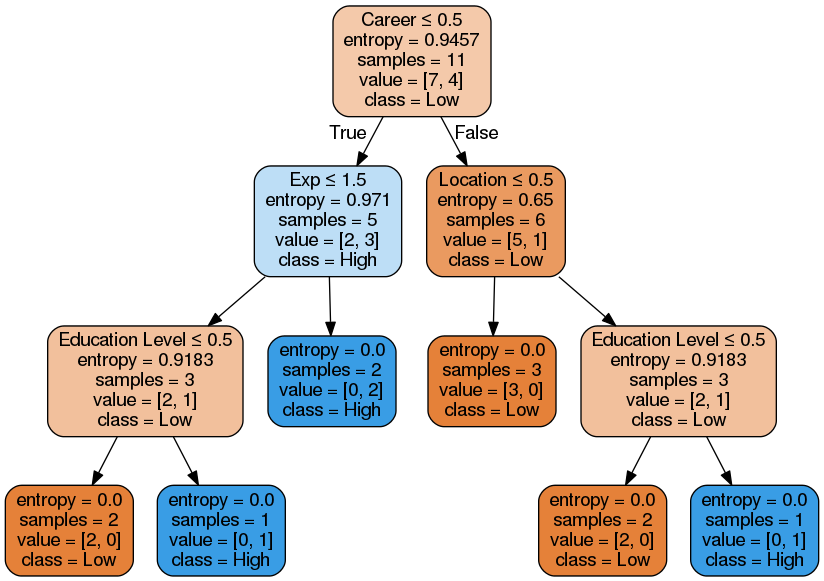

In [20]:
import numpy as np
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO  

data = np.loadtxt('spambase/q1.txt', dtype=str, delimiter=',')
np.place(data[:, 0], data[:, 0] == 'h', [0])#High School as '0'
np.place(data[:, 0], data[:, 0] == 'c', [1])#College 
np.place(data[:, 1], data[:, 1] == 'm', [0])#Management as '0'
np.place(data[:, 1], data[:, 1] == 's', [1])#Service as '1'
# YOP-> <3 as '0'
# YOP-> 3-10 as '1'
# YOP-> >10 as '2'
np.place(data[:, 3], data[:, 3] == 'o', [0])#Oregon as '0'
np.place(data[:, 3], data[:, 3] == 'c', [1])#California as '1'
np.place(data[:, 4], data[:, 4] == 'l', [0])#Low as '0'
np.place(data[:, 4], data[:, 4] == 'h', [1])#High as '1'
X = data[:, :-1]
y = data[:, -1]
# print X.shape, y.shape
# print X
# print y
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)
feature_names = ['Education Level', 'Career', 'Exp', 'Location']
target_names = ['Low', 'High']
dotfile = StringIO()
dot_data = tree.export_graphviz(clf, out_file=dotfile,
                                feature_names=feature_names,
                                class_names=target_names,
                                filled=True, rounded=True,
                                special_characters=True)
pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("dtree2.png")
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())